In [1]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import matplotlib.font_manager as fm
import statsmodels.api as sm # 쓰지는 않는다.
import sklearn as sk

In [2]:
#한글/차트 마이너스 없애기

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 전체 데이터 로드

In [3]:
# Bream(도미) 데이터 35개
# 특징(feature)
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
                11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
                475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
                575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
                920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8,
                8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

##### numpy 팁

In [4]:
# column_stack() = Pandas DataFrame()
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

#### 생선 데이터로 돌아가서

In [5]:
temp_data = np.row_stack((fish_length, fish_weight))
temp_data

array([[  25.4,   26.3,   26.5,   29. ,   29. ,   29.7,   29.7,   30. ,
          30. ,   30.7,   31. ,   31. ,   31.5,   32. ,   32. ,   32. ,
          33. ,   33. ,   33.5,   33.5,   34. ,   34. ,   34.5,   35. ,
          35. ,   35. ,   35. ,   36. ,   36. ,   37. ,   38.5,   38.5,
          39.5,   41. ,   41. ,    9.8,   10.5,   10.6,   11. ,   11.2,
          11.3,   11.8,   11.8,   12. ,   12.2,   12.4,   13. ,   14.3,
          15. ],
       [ 242. ,  290. ,  340. ,  363. ,  430. ,  450. ,  500. ,  390. ,
         450. ,  500. ,  475. ,  500. ,  500. ,  340. ,  600. ,  600. ,
         700. ,  700. ,  610. ,  650. ,  575. ,  685. ,  620. ,  680. ,
         700. ,  725. ,  720. ,  714. ,  850. , 1000. ,  920. ,  955. ,
         925. ,  975. ,  950. ,    6.7,    7.5,    7. ,    9.7,    9.8,
           8.7,   10. ,    9.9,    9.8,   12.2,   13.4,   12.2,   19.7,
          19.9]])

In [6]:
#[l,w] for l,w in zip(fish_length, fish_weight) 사용하지 마세요~~
fish_data = np.column_stack((fish_length,fish_weight)) # tuple 상태로 사용하기 때문에 괄호가 2개가 들어간다.
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [7]:
np.ones(35)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [8]:
np.zeros(14)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [9]:
# np.ones(), np.zeros()로 fish_target
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 사이킷런 함수
**train_test_split()**

In [10]:
# 훈련세트, 테스트세트 분리하는 함수
from sklearn.model_selection import train_test_split

In [11]:
# random_state 42
# train_input 부터 test_target 튜플에 정해진 순서가 틀리면 안된다.
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

In [12]:
train_input.shape

(36, 2)

In [13]:
train_input[:,0]

array([30. , 29. , 29.7, 11.3, 11.8, 13. , 32. , 30.7, 33. , 35. , 41. ,
       38.5, 25.4, 12. , 39.5, 29.7, 37. , 31. , 10.5, 26.3, 34. , 26.5,
       10.6,  9.8, 35. , 11.2, 31. , 34.5, 33.5, 15. , 34. , 30. , 11.8,
       32. , 36. , 11. ])

In [14]:
train_target.shape

(36,)

In [15]:
test_input.shape

(13, 2)

In [16]:
#3.3:1 비율로 도미비율이 높아서 훈련 결과가 좋지 않을 수 있다.
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

#### fish_target의 값을 *계층화(stratify)* 비율을 맞춰서 분할

In [17]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42, stratify=fish_target)

In [18]:
#test_target 값을 재확인
# 2.25:1
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

#### 수상한 도미!

length 25cm / weigt 150g

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
kn = KNeighborsClassifier() # 객체를 생성
kn.fit(X=train_input, y=train_target) #독립변수, 종속변수 /훈련실시

KNeighborsClassifier()

In [21]:
kn.score(X=test_input, y=test_target) # 정확도 1.0 -> 100%

1.0

In [22]:
# 도미 값을 입력하여 예측하기
kn.predict([[25.0, 150.0]])
# 그런데 얘는 빙어예요

array([0.])

#### 산점도를 통해서 왜 도미가 빙어로 둔갑이 되었을까? 알아보자!

In [23]:
weird_bream = np.array([25.0, 150.0])
weird_bream

array([ 25., 150.])

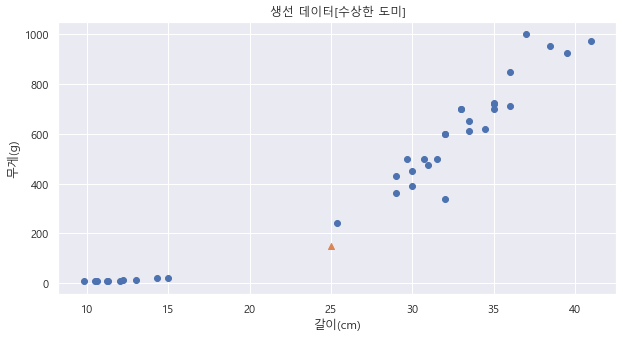

In [24]:
plt.figure(figsize=(10, 5))
plt.scatter(x=train_input[:,0], y=train_input[:,1])
plt.scatter(x=weird_bream[0], y=weird_bream[1], marker='^')
plt.title('생선 데이터[수상한 도미]')
plt.xlabel('갈이(cm)')
plt.ylabel('무게(g)')
plt.show()

##### k-최근접 이웃 알고리즘에서 이웃을 찾아주는 함수
kneighbors()

In [25]:
distance, indices = kn.kneighbors([weird_bream])

In [26]:
distance

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [27]:
indices

array([[21, 33, 19, 30,  1]], dtype=int64)

In [28]:
train_input[indices]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

##### 찾아낸 이웃값들을 산점도에 표시하기

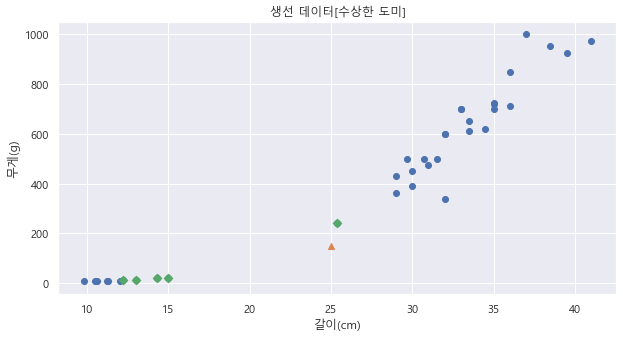

In [29]:
plt.figure(figsize=(10, 5))
plt.scatter(x=train_input[:,0], y=train_input[:,1]) # 전체 생선 데이터
plt.scatter(x=weird_bream[0], y=weird_bream[1], marker='^') # 예측 생선 데이터
plt.scatter(x=train_input[indices, 0], y=train_input[indices, 1], marker='D') #D -> 다이아몬드 / k-최근접 이웃으로 도출된 데이터
plt.title('생선 데이터[수상한 도미]')
plt.xlabel('갈이(cm)')
plt.ylabel('무게(g)')
plt.show()

##### 이유
x축은 단위가 5로, y축은 단위 200

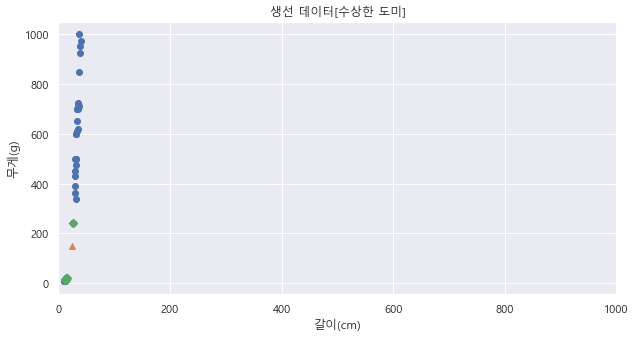

In [30]:
plt.figure(figsize=(10, 5))
plt.scatter(x=train_input[:,0], y=train_input[:,1])
plt.scatter(x=weird_bream[0], y=weird_bream[1], marker='^')
plt.scatter(x=train_input[indices, 0], y=train_input[indices, 1], marker='D')


plt.xlim((0,1000)) # x축 좌표를 1000까지 나오도록
plt.title('생선 데이터[수상한 도미]')
plt.xlabel('갈이(cm)')
plt.ylabel('무게(g)')
plt.show()

#### 데이터 전처리가 필요하다!

In [31]:
# 훈련세트 데이터의 전체 평균
mean = np.mean(a=train_input, axis=0)
mean

array([ 27.29722222, 454.09722222])

생선 길이의 평균 -> 27.2972

생선 무게의 평균 -> 454.0972

In [32]:
# 훈련세트 데이터의 전체 표준편차
std = np.std(a=train_input, axis=0)
std

array([  9.98244253, 323.29893931])

생선 길이의 표준편차 -> 9.98244253

생선 무게의 표준편차 -> 323.29893931

In [33]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


##### 표준점수 도출
- 도출한 평균과 표준편차로 계산해서 변경된 스케일 데이터를 추출한다
    - 스케일 세트  = (실제값 - 평균) / 표준편차 

In [34]:
train_scaled = (train_input - mean) /std
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

#### 재훈련

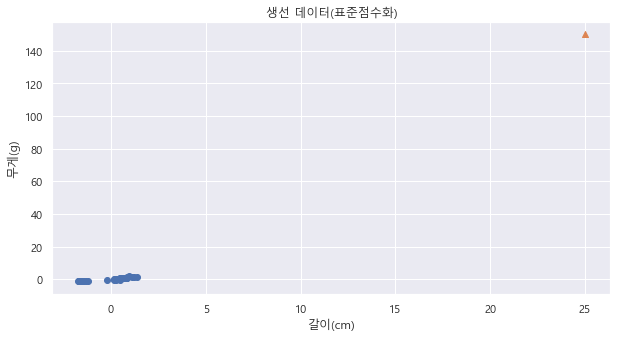

In [35]:
plt.figure(figsize=(10, 5))
plt.scatter(x=train_scaled[:,0], y=train_scaled[:,1])
plt.scatter(x=weird_bream[0], y=weird_bream[1], marker='^') # 예측 도미값은 표준 점수화를 하지 않음!
plt.title('생선 데이터(표준점수화)')
plt.xlabel('갈이(cm)')
plt.ylabel('무게(g)')
plt.show()

#### weird_bream 표준점수화

In [36]:
std_weird_bream = (weird_bream - mean) / std
std_weird_bream

array([-0.23012627, -0.94060693])

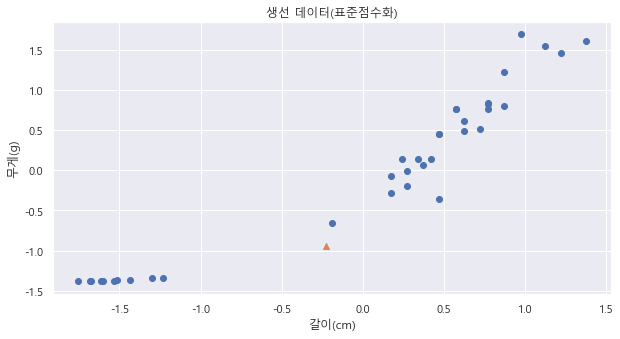

In [37]:
plt.figure(figsize=(10, 5))
plt.scatter(x=train_scaled[:,0], y=train_scaled[:,1])
plt.scatter(x=std_weird_bream[0], y=std_weird_bream[1], marker='^')
plt.title('생선 데이터(표준점수화)')
plt.xlabel('갈이(cm)')
plt.ylabel('무게(g)')
plt.show()

In [38]:
train_target

array([1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1.])

In [39]:
kn.fit(X=train_scaled, y=train_target)

KNeighborsClassifier()

In [40]:
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [41]:
test_input

array([[ 11. ,   9.7],
       [ 11.8,   9.9],
       [ 29.7, 450. ],
       [ 11.8,  10. ],
       [ 26.5, 340. ],
       [ 12.4,  13.4],
       [ 34. , 685. ],
       [ 34. , 575. ],
       [ 38.5, 920. ],
       [ 35. , 680. ],
       [ 26.3, 290. ],
       [ 31. , 500. ],
       [ 41. , 950. ]])

In [42]:
## 테스트셋을 표준점수화 시키지 않으면 이러한 문제가 나타난다.
kn.score(X=test_input, y=test_target)

0.6923076923076923

In [43]:
# 테스트셋도 표준점수화 시킨다.
test_scaled = (test_input - mean) / std
test_scaled

array([[-1.63258863, -1.37457062],
       [-1.55244793, -1.37395199],
       [ 0.24070039, -0.01267317],
       [-1.55244793, -1.37364268],
       [-0.07986244, -0.35291555],
       [-1.4923424 , -1.3631261 ],
       [ 0.67145669,  0.71420828],
       [ 0.67145669,  0.3739659 ],
       [ 1.12224816,  1.44108972],
       [ 0.77163257,  0.69874271],
       [-0.09989762, -0.50757117],
       [ 0.37092904,  0.14198246],
       [ 1.37268787,  1.5338831 ]])

In [44]:
kn.score(X=test_scaled, y=test_target)

1.0

In [45]:
## 재예측
kn.predict(X=[std_weird_bream])

array([1.])

#### 산점도에서 다시 확인

In [46]:
dist, inds = kn.kneighbors([std_weird_bream])
print((dist, inds))
# 21, 33, 19, 30, 1

(array([[0.2873737 , 0.7711188 , 0.89552179, 0.91493515, 0.95427626]]), array([[21, 14, 34, 32,  5]], dtype=int64))


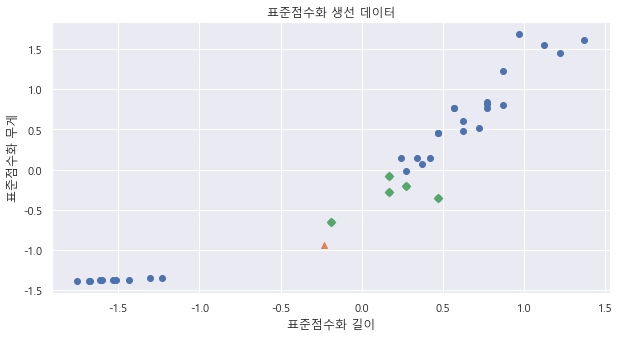

In [47]:
plt.figure(figsize=(10, 5))
plt.scatter(x=train_scaled[:,0], y=train_scaled[:,1])
plt.scatter(x=std_weird_bream[0], y=std_weird_bream[1], marker='^')
plt.scatter(x=train_scaled[inds, 0], y=train_scaled[inds, 1], marker='D')
plt.title('표준점수화 생선 데이터')
plt.xlabel('표준점수화 길이')
plt.ylabel('표준점수화 무게')
plt.show()

In [48]:
new_smelt =np.array([[10.0, 8.7]])
std_new_smelt = (new_smelt - mean) / std
std_new_smelt

array([[-1.73276452, -1.37766373]])

In [53]:
kn.predict(X=std_new_smelt)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1734822396.py, line 1)

In [50]:
std_new_smelt

array([[-1.73276452, -1.37766373]])

In [51]:
dist, inds = kn.kneighbors(std_new_smelt)
print((dist, inds))

(array([[0.02096849, 0.05022528, 0.0603351 , 0.1202592 , 0.13022865]]), array([[22, 24, 26, 11,  3]], dtype=int64))


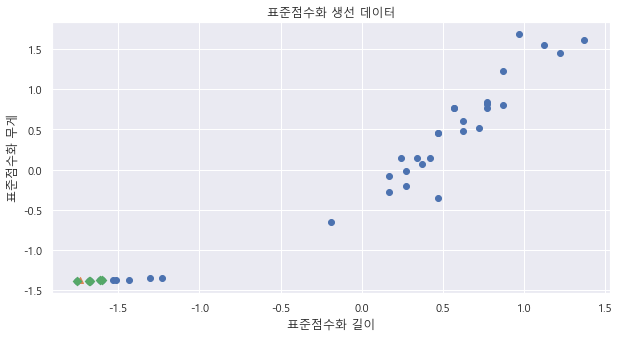

In [52]:
plt.figure(figsize=(10, 5))
plt.scatter(x=train_scaled[:,0], y=train_scaled[:,1])
plt.scatter(x=std_new_smelt[0][0], y=std_new_smelt[0][1], marker='^')
plt.scatter(x=train_scaled[inds, 0], y=train_scaled[inds, 1], marker='D')
plt.title('표준점수화 생선 데이터')
plt.xlabel('표준점수화 길이')
plt.ylabel('표준점수화 무게')
plt.show()